In [4]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Load dataset
df = pd.read_csv('../data/raw/mental_health_lifestyle_raw.csv')

print("Dataset loaded successfully")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset loaded successfully
Shape: 50000 rows, 17 columns


In [5]:
# Cell 2: Initial Data Overview
print("=" * 80)
print("DATASET STRUCTURE")
print("=" * 80)
print("\nColumn Names and Data Types:")
print(df.dtypes)

print("\n" + "=" * 80)
print("FIRST 5 RECORDS")
print("=" * 80)
display(df.head())

print("\n" + "=" * 80)
print("BASIC STATISTICS")
print("=" * 80)
display(df.describe(include='all'))

DATASET STRUCTURE

Column Names and Data Types:
User_ID                      int64
Age                          int64
Gender                      object
Occupation                  object
Country                     object
Mental_Health_Condition     object
Severity                    object
Consultation_History        object
Stress_Level                object
Sleep_Hours                float64
Work_Hours                   int64
Physical_Activity_Hours      int64
Social_Media_Usage         float64
Diet_Quality                object
Smoking_Habit               object
Alcohol_Consumption         object
Medication_Usage            object
dtype: object

FIRST 5 RECORDS


,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage
0,1,36,Male,Education,Australia,Yes,NaN,Yes,Low,7.6,46,8,2.2,Healthy,Regular Smoker,Regular Drinker,Yes
1,2,48,Male,Engineering,Other,No,Low,No,Low,6.8,74,2,3.4,Unhealthy,Heavy Smoker,Social Drinker,No
2,3,18,Prefer not to say,Sales,India,No,NaN,Yes,Medium,7.1,77,9,5.9,Healthy,Heavy Smoker,Social Drinker,No
3,4,30,Non-binary,Engineering,Australia,No,Medium,No,Low,6.9,57,4,5.4,Average,Regular Smoker,Regular Drinker,No
4,5,58,Male,IT,USA,Yes,NaN,Yes,High,4.7,45,10,3.3,Unhealthy,Regular Smoker,Non-Drinker,Yes



BASIC STATISTICS


,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage
count,50000.000000,50000.000000,50000,50000,50000,50000,24998,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000,50000,50000
unique,NaN,NaN,4,7,7,2,3,2,3,NaN,NaN,NaN,NaN,3,4,4,2
top,NaN,NaN,Female,Finance,India,No,Medium,No,Medium,NaN,NaN,NaN,NaN,Unhealthy,Non-Smoker,Regular Drinker,No
freq,NaN,NaN,12633,7286,7323,25003,8436,25110,16847,NaN,NaN,NaN,NaN,16729,12580,12531,25174
mean,25000.500000,41.473080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.009934,55.062860,4.982040,3.243160,NaN,NaN,NaN,NaN
std,14433.901067,13.844185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.732674,14.691575,3.161759,1.585235,NaN,NaN,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,30.000000,0.000000,0.500000,NaN,NaN,NaN,NaN
25%,12500.750000,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.500000,42.000000,2.000000,1.900000,NaN,NaN,NaN,NaN
50%,25000.500000,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,55.000000,5.000000,3.200000,NaN,NaN,NaN,NaN
75%,37500.250000,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.500000,68.000000,8.000000,4.600000,NaN,NaN,NaN,NaN


In [6]:
# Cell 3: Data Quality Check - Missing Values
print("=" * 80)
print("MISSING VALUES")
print("=" * 80)
# Note: Severity_of_Condition has missing values but is not included in our study
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percentage': missing_percent
})
print(missing_summary[missing_summary['Missing_Count'] > 0])

print("\n" + "=" * 80)
print("DUPLICATE RECORDS")
print("=" * 80)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

MISSING VALUES
          Missing_Count  Missing_Percentage
Severity          25002              50.004

DUPLICATE RECORDS
Number of duplicate rows: 0


STRESS LEVEL DISTRIBUTION
              Count  Percentage
Stress_Level                   
Medium        16847      33.694
High          16707      33.414
Low           16446      32.892


/var/folders/3c/lgrl46c16_154b0rwqhm_r4m0000gp/T/ipykernel_34835/1653384032.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Stress_Level', order=['Low', 'Medium', 'High'], palette='viridis')


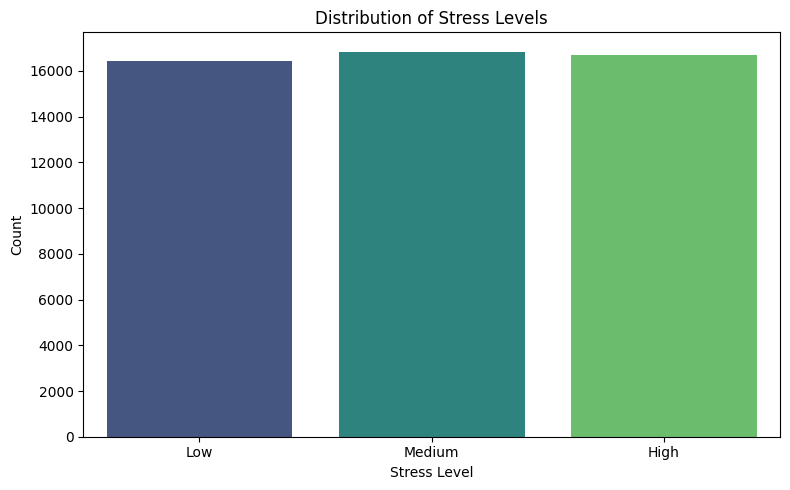

In [7]:
# Cell 4: Target Variable Analysis
print("=" * 80)
print("STRESS LEVEL DISTRIBUTION")
print("=" * 80)

stress_counts = df['Stress_Level'].value_counts()
stress_percent = df['Stress_Level'].value_counts(normalize=True) * 100

stress_summary = pd.DataFrame({
    'Count': stress_counts,
    'Percentage': stress_percent
})
print(stress_summary)

# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Stress_Level', order=['Low', 'Medium', 'High'], palette='viridis')
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

CONTINUOUS LIFESTYLE VARIABLES

Sleep_Hours:
count    50000.000000
mean         7.009934
std          1.732674
min          4.000000
25%          5.500000
50%          7.000000
75%          8.500000
max         10.000000
Name: Sleep_Hours, dtype: float64

Work_Hours:
count    50000.000000
mean        55.062860
std         14.691575
min         30.000000
25%         42.000000
50%         55.000000
75%         68.000000
max         80.000000
Name: Work_Hours, dtype: float64

Physical_Activity_Hours:
count    50000.000000
mean         4.982040
std          3.161759
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: Physical_Activity_Hours, dtype: float64

Social_Media_Usage:
count    50000.000000
mean         3.243160
std          1.585235
min          0.500000
25%          1.900000
50%          3.200000
75%          4.600000
max          6.000000
Name: Social_Media_Usage, dtype: float64


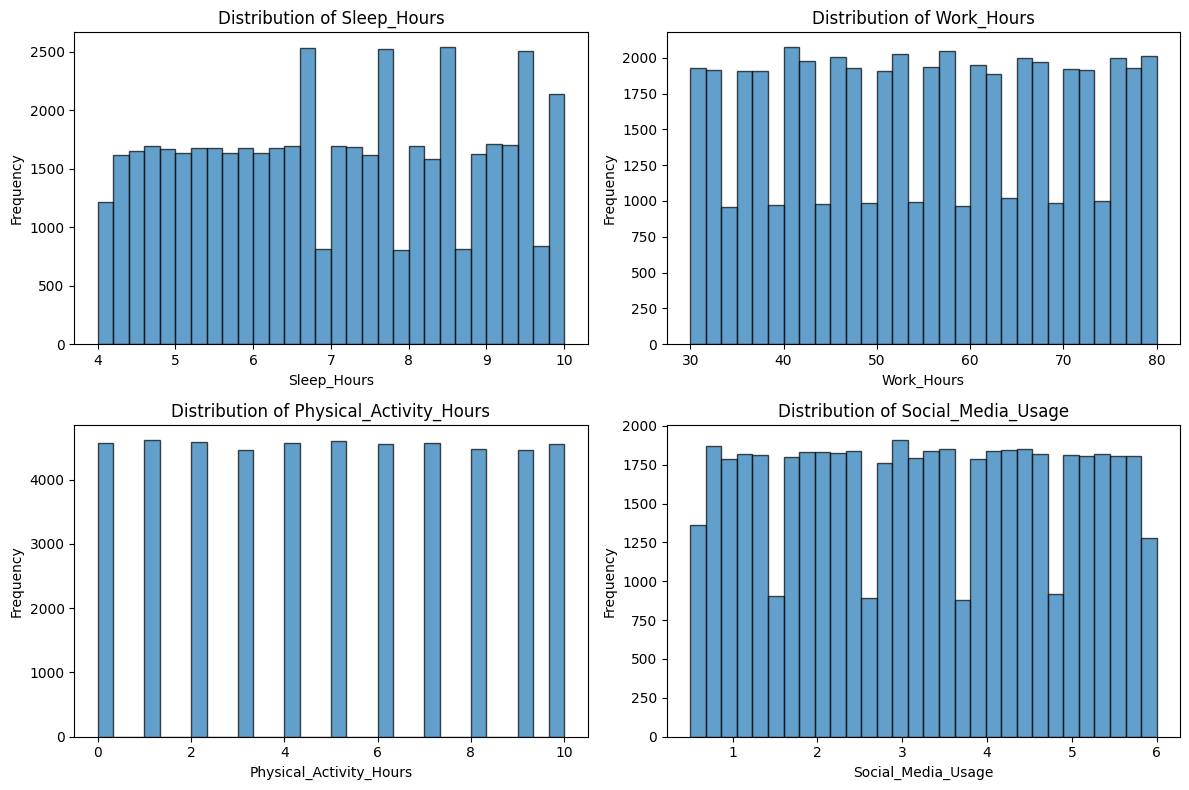

In [9]:
# Cell 5: Continuous Lifestyle Variables Analysis
print("=" * 80)
print("CONTINUOUS LIFESTYLE VARIABLES")
print("=" * 80)

continuous_vars = ['Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage']

for var in continuous_vars:
    print(f"\n{var}:")
    print(df[var].describe())

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, var in enumerate(continuous_vars):
    axes[idx].hist(df[var], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {var}')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

CATEGORICAL LIFESTYLE VARIABLES

Diet_Quality:
              Count  Percentage
Diet_Quality                   
Unhealthy     16729      33.458
Healthy       16638      33.276
Average       16633      33.266
----------------------------------------

Smoking_Habit:
                   Count  Percentage
Smoking_Habit                       
Non-Smoker         12580      25.160
Occasional Smoker  12556      25.112
Regular Smoker     12438      24.876
Heavy Smoker       12426      24.852
----------------------------------------

Alcohol_Consumption:
                     Count  Percentage
Alcohol_Consumption                   
Regular Drinker      12531      25.062
Non-Drinker          12507      25.014
Social Drinker       12488      24.976
Heavy Drinker        12474      24.948
----------------------------------------


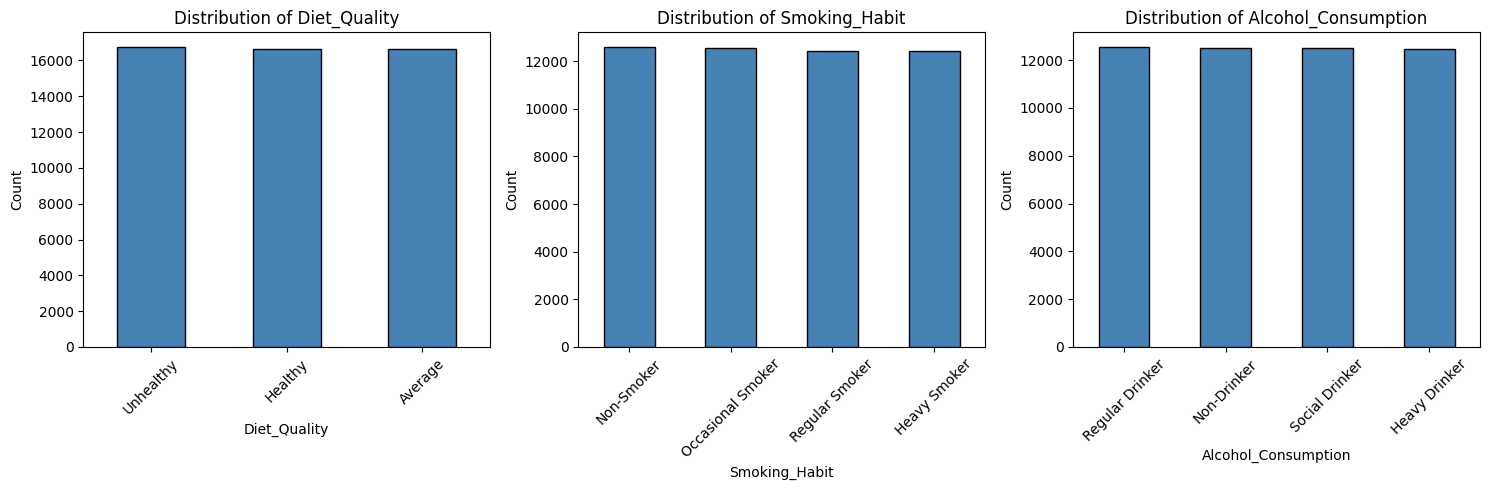

In [10]:
# Cell 6: Categorical Lifestyle Variables Analysis
print("=" * 80)
print("CATEGORICAL LIFESTYLE VARIABLES")
print("=" * 80)

categorical_vars = ['Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption']

for var in categorical_vars:
    print(f"\n{var}:")
    counts = df[var].value_counts()
    percentages = df[var].value_counts(normalize=True) * 100
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages
    })
    print(summary.to_string())
    print("-" * 40)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, var in enumerate(categorical_vars):
    df[var].value_counts().plot(kind='bar', ax=axes[idx], color='steelblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {var}')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [11]:
# Cell 7: Demographic Variables Analysis
print("=" * 80)
print("DEMOGRAPHIC VARIABLES")
print("=" * 80)

# Age (continuous)
print("\nAge:")
print(df['Age'].describe().to_string())
print("-" * 40)

# Gender
print("\nGender:")
gender_summary = pd.DataFrame({
    'Count': df['Gender'].value_counts(),
    'Percentage': df['Gender'].value_counts(normalize=True) * 100
})
print(gender_summary.to_string())
print("-" * 40)

# Occupation (top 10)
print("\nOccupation (Top 10):")
occupation_summary = pd.DataFrame({
    'Count': df['Occupation'].value_counts().head(10),
    'Percentage': df['Occupation'].value_counts(normalize=True).head(10) * 100
})
print(occupation_summary.to_string())
print(f"\nTotal unique occupations: {df['Occupation'].nunique()}")
print("-" * 40)

# Country (top 10)
print("\nCountry (Top 10):")
country_summary = pd.DataFrame({
    'Count': df['Country'].value_counts().head(10),
    'Percentage': df['Country'].value_counts(normalize=True).head(10) * 100
})
print(country_summary.to_string())
print(f"\nTotal unique countries: {df['Country'].nunique()}")

DEMOGRAPHIC VARIABLES

Age:
count    50000.000000
mean        41.473080
std         13.844185
min         18.000000
25%         29.000000
50%         41.000000
75%         53.000000
max         65.000000
----------------------------------------

Gender:
                   Count  Percentage
Gender                              
Female             12633      25.266
Prefer not to say  12558      25.116
Male               12473      24.946
Non-binary         12336      24.672
----------------------------------------

Occupation (Top 10):
             Count  Percentage
Occupation                    
Finance       7286      14.572
IT            7281      14.562
Other         7112      14.224
Healthcare    7105      14.210
Education     7089      14.178
Engineering   7072      14.144
Sales         7055      14.110

Total unique occupations: 7
----------------------------------------

Country (Top 10):
           Count  Percentage
Country                     
India       7323      14.646
USA   

CORRELATION MATRIX - CONTINUOUS VARIABLES
                              Age  Sleep_Hours  Work_Hours  Physical_Activity_Hours  Social_Media_Usage
Age                      1.000000    -0.001957   -0.002954                 0.003151           -0.004496
Sleep_Hours             -0.001957     1.000000   -0.006019                 0.004158           -0.001160
Work_Hours              -0.002954    -0.006019    1.000000                -0.002763            0.004516
Physical_Activity_Hours  0.003151     0.004158   -0.002763                 1.000000            0.007439
Social_Media_Usage      -0.004496    -0.001160    0.004516                 0.007439            1.000000


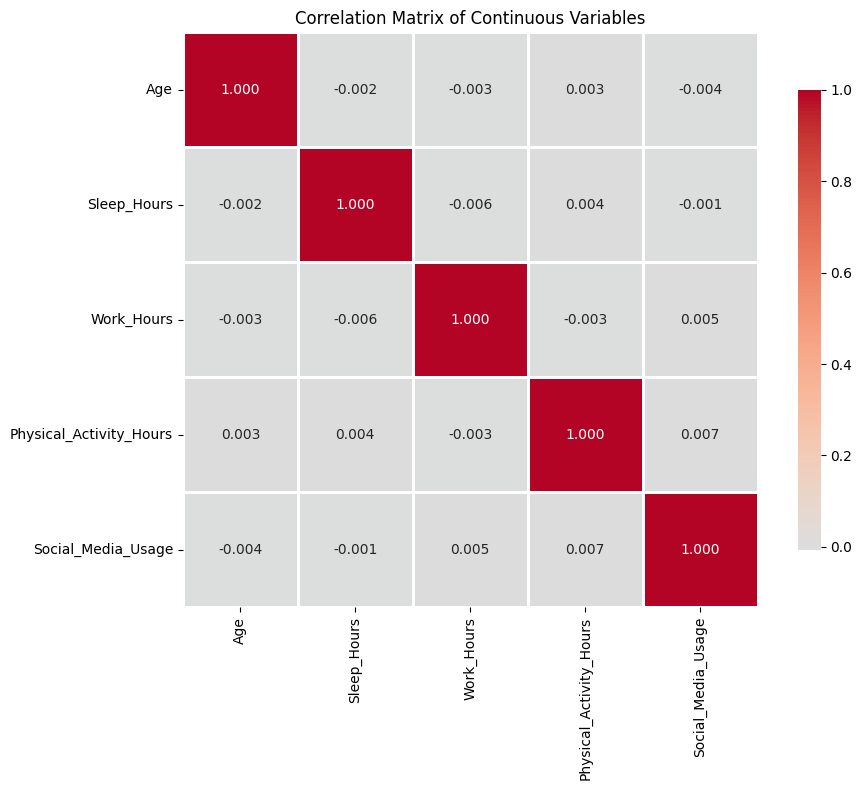

In [13]:
# Cell 8: Correlation Analysis - Continuous Variables
print("=" * 80)
print("CORRELATION MATRIX - CONTINUOUS VARIABLES")
print("=" * 80)

continuous_vars = ['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage']
correlation_matrix = df[continuous_vars].corr()

print(correlation_matrix.to_string())

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Continuous Variables')
plt.tight_layout()
plt.show()

LIFESTYLE VARIABLES ACROSS STRESS LEVELS

Sleep_Hours by Stress Level:
                  mean       std  min   max
Stress_Level                               
High          7.040672  1.732585  4.0  10.0
Low           6.994017  1.723630  4.0  10.0
Medium        6.994990  1.741244  4.0  10.0
----------------------------------------

Work_Hours by Stress Level:
                   mean        std   min   max
Stress_Level                                  
High          54.994074  14.685910  30.0  80.0
Low           55.213365  14.647940  30.0  80.0
Medium        54.984151  14.739397  30.0  80.0
----------------------------------------

Physical_Activity_Hours by Stress Level:
                  mean       std  min   max
Stress_Level                               
High          4.954211  3.164699  0.0  10.0
Low           5.028335  3.163458  0.0  10.0
Medium        4.964445  3.156864  0.0  10.0
----------------------------------------

Social_Media_Usage by Stress Level:
                  mean 

/var/folders/3c/lgrl46c16_154b0rwqhm_r4m0000gp/T/ipykernel_34835/1501279444.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stress_Level', y=var, order=['Low', 'Medium', 'High'],
/var/folders/3c/lgrl46c16_154b0rwqhm_r4m0000gp/T/ipykernel_34835/1501279444.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stress_Level', y=var, order=['Low', 'Medium', 'High'],
/var/folders/3c/lgrl46c16_154b0rwqhm_r4m0000gp/T/ipykernel_34835/1501279444.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stress_Level',

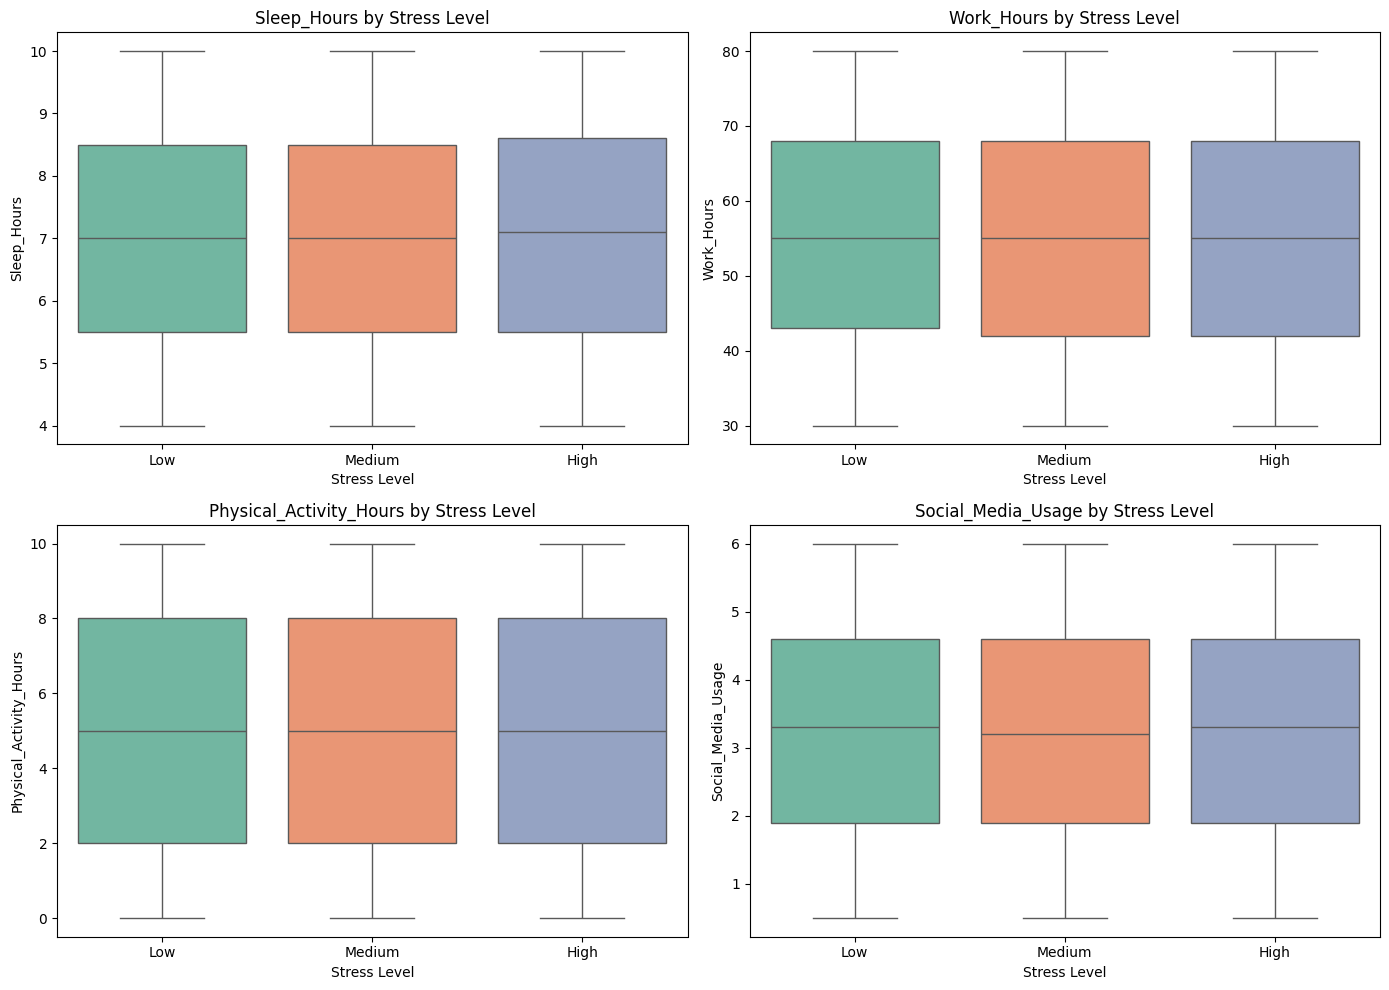

In [15]:
# Cell 9: Lifestyle Variables by Stress Level
print("=" * 80)
print("LIFESTYLE VARIABLES ACROSS STRESS LEVELS")
print("=" * 80)

# Continuous variables by stress level
continuous_lifestyle = ['Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage']

for var in continuous_lifestyle:
    print(f"\n{var} by Stress Level:")
    grouped = df.groupby('Stress_Level')[var].describe()[['mean', 'std', 'min', 'max']]
    print(grouped.to_string())
    print("-" * 40)

# Visualization - Boxplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, var in enumerate(continuous_lifestyle):
    sns.boxplot(data=df, x='Stress_Level', y=var, order=['Low', 'Medium', 'High'], 
                palette='Set2', ax=axes[idx])
    axes[idx].set_title(f'{var} by Stress Level')
    axes[idx].set_xlabel('Stress Level')
    axes[idx].set_ylabel(var)

plt.tight_layout()
plt.show()

CATEGORICAL VARIABLES BY STRESS LEVEL

Diet_Quality by Stress Level:
Stress_Level   High    Low  Medium
Diet_Quality                      
Average       33.45  33.33   33.22
Healthy       33.52  32.23   34.25
Unhealthy     33.27  33.12   33.61
----------------------------------------

Smoking_Habit by Stress Level:
Stress_Level        High    Low  Medium
Smoking_Habit                          
Heavy Smoker       33.30  32.74   33.96
Non-Smoker         33.73  32.96   33.31
Occasional Smoker  33.46  32.62   33.92
Regular Smoker     33.16  33.25   33.58
----------------------------------------

Alcohol_Consumption by Stress Level:
Stress_Level          High    Low  Medium
Alcohol_Consumption                      
Heavy Drinker        33.36  33.07   33.57
Non-Drinker          33.32  32.69   33.99
Regular Drinker      33.80  32.77   33.43
Social Drinker       33.18  33.04   33.78
----------------------------------------


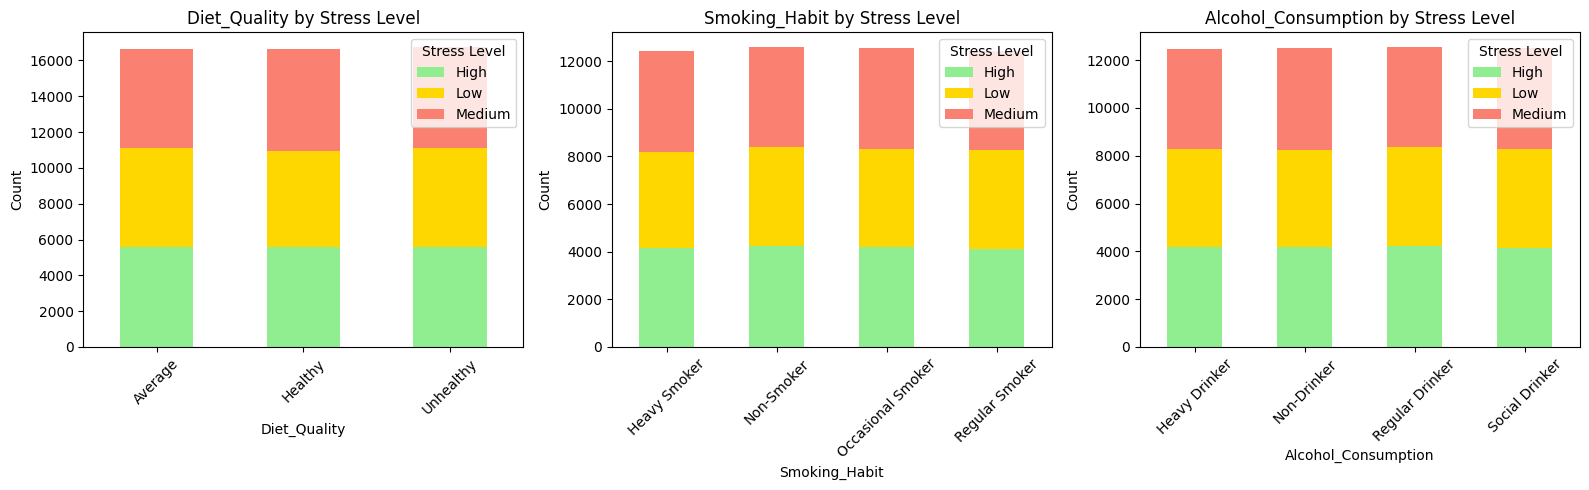

In [16]:
# Cell 10: Categorical Variables by Stress Level - Cross-tabulation
print("=" * 80)
print("CATEGORICAL VARIABLES BY STRESS LEVEL")
print("=" * 80)

categorical_lifestyle = ['Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption']

for var in categorical_lifestyle:
    print(f"\n{var} by Stress Level:")
    crosstab = pd.crosstab(df[var], df['Stress_Level'], normalize='index') * 100
    print(crosstab.round(2).to_string())
    print("-" * 40)

# Visualization - Stacked bar charts
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, var in enumerate(categorical_lifestyle):
    crosstab_counts = pd.crosstab(df[var], df['Stress_Level'])
    crosstab_counts.plot(kind='bar', stacked=True, ax=axes[idx], 
                         color=['lightgreen', 'gold', 'salmon'])
    axes[idx].set_title(f'{var} by Stress Level')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Count')
    axes[idx].legend(title='Stress Level')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [19]:
# Cell 11: Key Findings Summary
print("=" * 80)
print("KEY FINDINGS SUMMARY")
print("=" * 80)

print("\n1. DATA QUALITY:")
print(f"   - Total records: {len(df):,}")
print(f"   - Duplicate records: {df.duplicated().sum()}")
print(f"   - Missing values: Only in Severity_of_Condition (not used in study)")

print("\n2. TARGET VARIABLE:")
stress_dist = df['Stress_Level'].value_counts(normalize=True) * 100
print(f"   - Low: {stress_dist.get('Low', 0):.1f}%")
print(f"   - Medium: {stress_dist.get('Medium', 0):.1f}%")
print(f"   - High: {stress_dist.get('High', 0):.1f}%")

print("\n3. LIFESTYLE VARIABLES:")
print(f"   - Sleep Hours: Mean = {df['Sleep_Hours'].mean():.2f}, Range = [{df['Sleep_Hours'].min():.1f}, {df['Sleep_Hours'].max():.1f}]")
print(f"   - Work Hours: Mean = {df['Work_Hours'].mean():.2f}, Range = [{df['Work_Hours'].min():.1f}, {df['Work_Hours'].max():.1f}]")
print(f"   - Physical Activity: Mean = {df['Physical_Activity_Hours'].mean():.2f}, Range = [{df['Physical_Activity_Hours'].min():.1f}, {df['Physical_Activity_Hours'].max():.1f}]")
print(f"   - Social Media: Mean = {df['Social_Media_Usage'].mean():.2f}, Range = [{df['Social_Media_Usage'].min():.1f}, {df['Social_Media_Usage'].max():.1f}]")

print("\n4. DEMOGRAPHIC VARIABLES:")
print(f"   - Age: Mean = {df['Age'].mean():.1f}, Range = [{df['Age'].min()}, {df['Age'].max()}]")
print(f"   - Gender distribution: {df['Gender'].value_counts().to_dict()}")
print(f"   - Unique occupations: {df['Occupation'].nunique()}")
print(f"   - Unique countries: {df['Country'].nunique()}")

print("\n5. OBSERVATIONS FOR MODELING:")
print("   - All 7 lifestyle variables are present and complete")
print("   - Target variable is balanced across three stress categories")
print("   - Continuous variables show reasonable distributions")
print("   - Categorical variables have multiple levels suitable for encoding")
print("   - Dataset is ready for preprocessing stage")

print("\n" + "=" * 80)
print("DATA EXPLORATION COMPLETE")
print("=" * 80)

KEY FINDINGS SUMMARY

1. DATA QUALITY:
   - Total records: 50,000
   - Duplicate records: 0
   - Missing values: Only in Severity_of_Condition (not used in study)

2. TARGET VARIABLE:
   - Low: 32.9%
   - Medium: 33.7%
   - High: 33.4%

3. LIFESTYLE VARIABLES:
   - Sleep Hours: Mean = 7.01, Range = [4.0, 10.0]
   - Work Hours: Mean = 55.06, Range = [30.0, 80.0]
   - Physical Activity: Mean = 4.98, Range = [0.0, 10.0]
   - Social Media: Mean = 3.24, Range = [0.5, 6.0]

4. DEMOGRAPHIC VARIABLES:
   - Age: Mean = 41.5, Range = [18, 65]
   - Gender distribution: {'Female': 12633, 'Prefer not to say': 12558, 'Male': 12473, 'Non-binary': 12336}
   - Unique occupations: 7
   - Unique countries: 7

5. OBSERVATIONS FOR MODELING:
   - All 7 lifestyle variables are present and complete
   - Target variable is balanced across three stress categories
   - Continuous variables show reasonable distributions
   - Categorical variables have multiple levels suitable for encoding
   - Dataset is ready fo